# **Problem Statement**
Design and implement an ML-based system to evaluate the quality and relevancy of Google location reviews.

# Data Collection and Cleaning
A total of 2 public datasets were used.
- Google Local Reviews on Kaggle: https://www.kaggle.com/datasets/denizbilginn/google-maps-restaurant-reviews
- Google Local review data: https://mcauleylab.ucsd.edu/public_datasets/gdrive/googlelocal/

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

Current dataframes:<br>
df_alaska (525k reviews - labeled rating, unlabeled category) <br>
  - df_categorized (13k rows pseudo-labeled by chatgpt)

df_kaggle (1k reviews - labeled rating and category)

## Loading Downloaded Data from Github

created dataframes: <br>
df_alaska (labeled rating, unlabeled category) <br>
df_kaggle (labeled rating and category) <br>
<br>



In [ ]:
# the bigger dataset
# source: https://mcauleylab.ucsd.edu/public_datasets/gdrive/googlelocal/#subsets
url = "https://raw.githubusercontent.com/BirdsArentReal/TikTokTechJam-2025-ReviewClassifier/refs/heads/take3/Alaska10/review_0{number}.json"
df_alaska = pd.read_json(url.format(number = 1), lines=True)

for i in range(2, 7):
  df_temp = pd.read_json(url.format(number = i), lines = True)
  df_alaska = pd.concat([df_alaska, df_temp], ignore_index=True)

In [ ]:
df_alaska.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.091298e+20,Nicki Gore,1566331951619,5,We always stay here when in Valdez for silver ...,None,None,0x56b646ed2220b77f:0xd8975e316de80952
1,1.132409e+20,Allen Ratliff,1504917982385,5,Great campground for the price. Nice hot unlim...,None,None,0x56b646ed2220b77f:0xd8975e316de80952
2,1.130448e+20,Jonathan Tringali,1474765901185,4,We tent camped here for 2 nights while explori...,None,None,0x56b646ed2220b77f:0xd8975e316de80952


In [ ]:
print(len(df_alaska))
print(df_alaska.columns)

521515
Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')


In [ ]:
# combining columns tester
"""
df_1 = df_alaska.head(1)
df_2 = df_alaska.head(2)
print(df_1.columns)
print(df_2.columns)
df_3 = pd.concat([df_1, df_2], ignore_index=True)
print(df_3.columns)
df_3
"""
pass

In [ ]:
# kaggle
# source: https://www.kaggle.com/datasets/denizbilginn/google-maps-restaurant-reviews/data
kaggle_url = "https://raw.githubusercontent.com/BirdsArentReal/TikTokTechJam-2025-ReviewClassifier/refs/heads/take3/Kaggle%20reviews/reviews.csv"
df_kaggle = pd.read_csv(kaggle_url)


In [ ]:
df_kaggle.head(3)

,business_name,author_name,text,photo,rating,rating_category
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere


In [ ]:
df_kaggle["rating_category"].unique()

array(['taste', 'menu', 'outdoor_atmosphere', 'indoor_atmosphere'],
      dtype=object)

In [ ]:
df_alaska.loc[2, "text"]

"We tent camped here for 2 nights while exploring Valdez. The center of the campground was in the open and there are treed sites around the edges. Don't expect lower foliage separating the sites. Still this is much nicer than the other RV parking lots in town which seemed wide open.\n\nThere is a bath house with 1 set of coin operated washer/dryer, 2 restrooms (sink toilet) and 2 shower rooms (sink, toilet, shower). The hot water will run out after a few showers. They provide floor mats towels for you to use which is nice, but they lack vent fans to remove moisture so it is prone to mold.\n\nWi-Fi didn't reach our site on the back edge of the campground. Overall we were happy with our stay at this campground and would stay there again."

## Data Cleaning

In [ ]:
df_alaska.head(1)

,user_id,name,time,rating,text,gmap_id
0,1.091298e+20,Nicki Gore,1566331951619,5,We always stay here when in Valdez for silver ...,0x56b646ed2220b77f:0xd8975e316de80952


In [ ]:
len(df_alaska)

521515

In [ ]:
# pics and resp column dropped. Reviews without text are also dropped.
df_alaska = df_alaska.iloc[:,[0,1,2,3,4,7]].dropna()
df_alaska['time'] = pd.to_datetime(df_alaska['time'], unit='ms')
df_alaska.head(3)

,user_id,name,time,rating,text,gmap_id
0,1.091298e+20,Nicki Gore,2019-08-20 20:12:31.619,5,We always stay here when in Valdez for silver ...,0x56b646ed2220b77f:0xd8975e316de80952
1,1.132409e+20,Allen Ratliff,2017-09-09 00:46:22.385,5,Great campground for the price. Nice hot unlim...,0x56b646ed2220b77f:0xd8975e316de80952
2,1.130448e+20,Jonathan Tringali,2016-09-25 01:11:41.185,4,We tent camped here for 2 nights while explori...,0x56b646ed2220b77f:0xd8975e316de80952


In [ ]:
# Only 57% of data has text reviews
len(df_alaska)

298257

# Exploratory Data Analysis

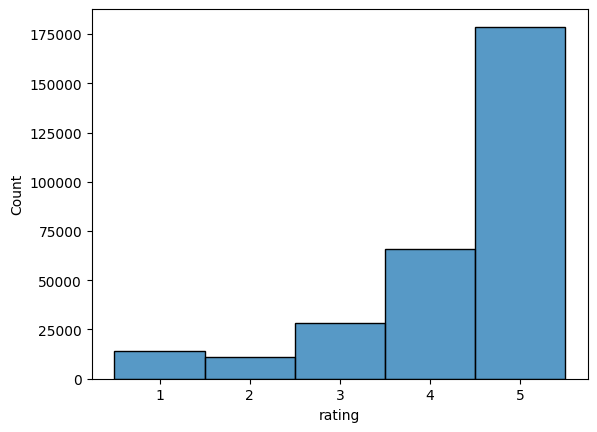

In [ ]:
# Rating distribution
sns.histplot(data=df_alaska, x="rating", discrete=True)
plt.show()

We observe that the data is left skewed, and majority of the ratings are positive.

In [ ]:
df_alaska['user_id'].nunique()

18251

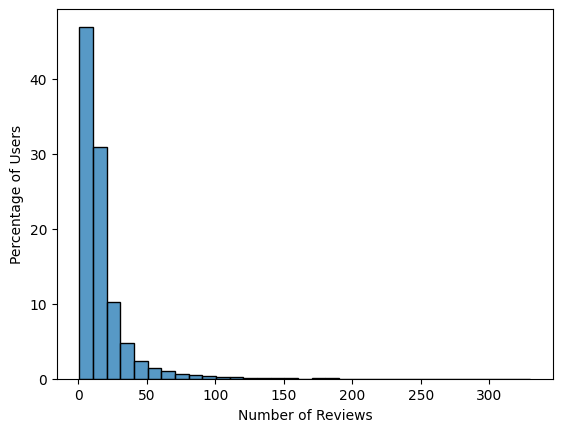

In [ ]:
# Number of reviews written by people with same id
fig, ax = plt.subplots()
df_alaska_review_count = df_alaska.groupby('user_id').count().iloc[:,[0]]
df_alaska_review_count.columns = ['Number of Reviews']
sns.histplot(data=df_alaska_review_count, x='Number of Reviews', binwidth = 10, stat = "percent")
ax.set_ylabel("Percentage of Users")
plt.show()

Most people write 1-10 reviews, and majority write less than 30 reviews.

In [ ]:
df_alaska['name'].nunique()

18347

We have 18251 unique ids but 18347 unique names. This suggest some users changed their names.

In [ ]:
#Finding users with same ids but different name
df_alaska_test = df_alaska.drop_duplicates(subset=['user_id', 'name'], keep="first").sort_values(by='user_id')
df_alaska_test

,user_id,name,time,rating,text,gmap_id
30413,1.000027e+20,orlando taporco,1520557742465,4,Good place to hang out with,0x56c897b9a7bc818d:0x5dd769013d9746bb
278966,1.000038e+20,Erica Hill,1533221111371,5,"The Lavender Cosmo, Alaskan Ceviche and the Cr...",0x56c8bd815ed59f9f:0x17b860455da227f4
163503,1.000043e+20,M Ric,1496466574307,3,Basic Ice Arena for hockey and other events in...,0x51325ab667dfd657:0xa36e4c2d6dba13ae
225071,1.000061e+20,Francis B,1554881462348,5,"Great experience, great food, and friends wait...",0x56c89628b3e0c5f9:0xf90b4630650f3f76
74531,1.000062e+20,C•lt•n G.,1612946753577,2,Was pretty busy both times i stopped by,0x56c8de6e5d30eeb1:0x5ddf794e7a649e65
...,...,...,...,...,...,...
84013,1.184399e+20,Edward Williams,1545458784860,1,Need to update menu info and put no deliveries...,0x56c897c9327e56a7:0xcf6a4d514aafa5fe
133210,1.184433e+20,Carol Dement,1549783890939,5,Phantom of the Opera performed by Colony High ...,0x56c8e1bb504c69fb:0xd4915e2b7a8aca26
126427,1.184448e+20,Eric Wyatt,1559677037523,5,Wonderful food and service.,0x51324548f376a9dd:0x839c3d80e7c91e72
24303,1.184453e+20,Carrie Martyn,1554749788708,5,Great place to sneak away upstairs for a jenga...,0x513244cdbb27e60d:0x18163c5c24754d20


It seems that are both different users_id with same names and same user_id but different names. We will take a look at both cases.

In [ ]:
mask = df_alaska_test.duplicated(subset=['user_id'], keep=False)
df_alaska_filtered = df_alaska_test[mask]
df_alaska_filtered.sort_values(by='user_id')

,user_id,name,time,rating,text,gmap_id
74531,1.000062e+20,C•lt•n G.,1612946753577,2,Was pretty busy both times i stopped by,0x56c8de6e5d30eeb1:0x5ddf794e7a649e65
15483,1.000062e+20,C•lt•n G. (KodakColt),1612947449534,4,Was very beautiful weather that day for sure,0x56c8ddf5d42ad875:0xd066330a695740f4
16527,1.000857e+20,Daniel Smith,1563692665437,5,Love this place,0x56c89687be682f09:0x5d2b0fb89680975e
5339,1.000857e+20,Rick O'Riley,1563693246199,5,Favorite,0x56c8bd854338b6db:0xbf5a0e1c765c0d53
328760,1.001830e+20,Amber Clarambeau,1615847080501,5,Great dessert,0x56c897b96607a6c5:0xefdb8b865926d2a4
...,...,...,...,...,...,...
1122,1.183944e+20,Mike S,1467876653337,4,Decent American-style Chinese food for somewhe...,0x57abb0cfc31c0d15:0xb167f2687bc999cc
57990,1.184085e+20,Rebecca Paulsen,1617998171701,4,"Very SATISFIED 😀, The reps who assisted me wer...",0x56c89629bde7481f:0x2e94b2ee2b13f976
21296,1.184085e+20,Rebecca Paulsen (Beck Woodall),1580404250500,3,Efficient but staff is not that personable,0x56c897c86811d3bd:0xe4930572fdc2752f
160167,1.184147e+20,Tomas Hansen,1526942947538,5,"Expert and attentive staff, willing and able t...",0x56c8bd807d9ebe25:0xd6fe574ed0da425a


In [ ]:
mask = df_alaska_test.duplicated(subset=['name'], keep=False)
df_alaska_filtered = df_alaska_test[mask]
df_alaska_filtered.sort_values(by='name')

,user_id,name,time,rating,text,gmap_id
2021,1.075278e+20,A B,1518061446532,5,I stop by here every morning. The girls are s...,0x56c897a8df40fd71:0xdeb7e3ffaa7f1092
17362,1.164731e+20,A B,1579481077084,4,The seats exist! And my knees didn't knock aga...,0x5400df83199e19d1:0xd3f262d7708e47ba
25254,1.062315e+20,A B,1540481675758,5,Great place to go if in need. They serve hot s...,0x56c8962f5bd5c625:0x87f6ef93070c30f4
37663,1.136760e+20,A C,1543214607091,5,Friendly staff and caring doctors. I know my p...,0x56c896ef3ec667e3:0x5e252c3bc5ebb536
23055,1.152170e+20,A C,1455756192545,5,These guys saved my car! It's very likely they...,0x56c8978c4d5d4081:0xb2213ca9f92841ef
...,...,...,...,...,...,...
13817,1.081053e+20,jason parson,1559835869951,5,Great food and super nice people,0x56c89792537f15c7:0xff259d38a6f51288
4143,1.135403e+20,william walker,1603064633311,4,Nice hot showers.,0x56c8c549cad60b43:0x91d225b674e43299
389070,1.083210e+20,william walker,1572968586064,5,"excellent food, customer service, delivery tim...",0x56c896591ebe1871:0x1a6bd0ee6df3eff2
18863,1.036072e+20,willis tapscott,1470340137032,5,Top of the line in customer service and suppor...,0x56c897832593a1fb:0x873fb93675b3c0c6


In [ ]:
#Reviews of people with same name but different accounts
df_alaska_filtered.iloc[:,[1,3,4]].sort_values(by='name')

,name,rating,text
2021,A B,5,I stop by here every morning. The girls are s...
17362,A B,4,The seats exist! And my knees didn't knock aga...
25254,A B,5,Great place to go if in need. They serve hot s...
37663,A C,5,Friendly staff and caring doctors. I know my p...
23055,A C,5,These guys saved my car! It's very likely they...
...,...,...,...
13817,jason parson,5,Great food and super nice people
4143,william walker,4,Nice hot showers.
389070,william walker,5,"excellent food, customer service, delivery tim..."
18863,willis tapscott,5,Top of the line in customer service and suppor...


Suspecting that accounts with the same name might be spam accounts, we looked at some of the reviews written, but did not see anything out of the ordinary.

In [ ]:
# df_alaska_filtered.iloc[:,[1,3,4]].sort_values(by='name')
# rows = df_alaska_filtered.groupby('name').filter(lambda group: group.shape[0] >= 3).groupby('name').first()
# rows
df = df_alaska_filtered.groupby('name').count()
df[df['text'] > 3]

,user_id,time,rating,text,gmap_id
name,,,,,
A Google User,36,36,36,36,36
Brian,5,5,5,5,5
David Brown,4,4,4,4,4
J B,4,4,4,4,4
James Smith,4,4,4,4,4
Michael Smith,4,4,4,4,4
R P,5,5,5,5,5
Robert,4,4,4,4,4


In [ ]:
df2 = df_alaska_filtered[df_alaska_filtered['name'] == 'David Brown']
df2.iloc[:,[1,3,4]]

,name,rating,text
26462,David Brown,5,Chinese food in Alaska?! Who would have though...
63425,David Brown,5,This place is even better with the dog park!
16580,David Brown,4,Professional and quick. Reasonable pricing.
62462,David Brown,2,Coffee is meh. And twice now they've gotten my...


A sample check on names with more than 3 accounts did not show anything suspicious, and we attribute this to the names being common.

# Feature Engineering

# Modeling
Pipeline: <br>
review -> link checker -> advertisement checker -> sentiment checker -> topic checker -> relevancy checker -> final score

## Regex to filter links and stuff

Got a <br>
http/https filter <br>
www. filter <br>
.com/.net/.org filter <br>
<br>
Use RegexChecker.url_probability(string) to see how many times it violates the filters.


In [ ]:
# apparently python doesn't really need escape for /
http_capture = r"(?:http|https)//"

# testing regex
no_http = re.search(http_capture, "wroeifcvnbwfvivpinrioeiuosrdfvb ;iof")
yes_http = re.search(http_capture, "erwiopdvineowepofhttp.eawroeivfboiw")
yes_http_with_slash = re.search(http_capture, "ewoiedovhttp//ehwiuv")
yes_https_with_slash = re.search(http_capture, "ieuroifbewofvfbrhttps//eaowrpsvoe")

print(no_http)
print(yes_http)
print(yes_http_with_slash)
print(yes_https_with_slash)

None
None
<re.Match object; span=(8, 14), match='http//'>
<re.Match object; span=(16, 23), match='https//'>


In [ ]:
# maybe we just do a http_capture, www_capture, .com/.net/etc capture
# and have them vote on whether it's a link?
# not sure how to robustly check all forms of links
# unless we should instead just do like one big regex that only returns true if all match


In [ ]:
www_capture = r"(www)\."

no_www = re.search(www_capture, "eiwodpvfbiefowpodfkeopwwekwoepdvfbejwopsfd")
yes_www = re.search(www_capture, "beirwospdnveoipawrjoeirwpoeprwdnfjwwwveoinf")
yes_www_with_dot = re.search(www_capture, "bjrtrapidfwww.eowipboiwpfpo")

print(no_www)
print(yes_www)
print(yes_www_with_dot)

None
None
<re.Match object; span=(10, 14), match='www.'>


In [ ]:
domain_capture = r"\.(com|net|org)"

no_domain = re.search(domain_capture, "bieorpsvn.rboeipovn doni.helloworld")
dot_com = re.search(domain_capture, "reriiewk[f[.comeoirpovnoierhwo[[]]")
dot_net = re.search(domain_capture, "erjifiboifi.netvp90dojnopsjvn")

print(no_domain)
print(dot_com)
print(dot_net)

None
<re.Match object; span=(11, 15), match='.com'>
<re.Match object; span=(11, 15), match='.net'>


In [ ]:
class RegexChecker:
  # static variables; make sure to update the tuples as needed
  # regex captures
  http_capture = r"(http|https)//"
  www_capture = r"(www)\."
  domain_capture = r"\.(com|net|org)"

  # offset captures
  # email_capture = r"[a-zA-Z0-9]@[a-zA-Z0-9]+\.(com|net|org)"

  captures_tuple = (http_capture, www_capture, domain_capture)
  # offset_tuple = (email_capture,)


  def __init__(self):
    pass

  # returns an int representing how many captures got hit
  def count_captures(string):
    count = 0
    for i in RegexChecker.captures_tuple:
      if re.search(i, string):
        count += 1

    #for i in RegexChecker.offset_tuple:
     # if re.search(i, string):
      #  count -= 1
    return count

  # returns a double between 0 and 1 representing the
  # probability of the string being a url
  # (proportion of captures being flagged)
  def url_probability(string):
    return float(RegexChecker.count_captures(string)) / len(RegexChecker.captures_tuple)

In [ ]:
# http and www.
RegexChecker.count_captures("cvieuowivborifvhttp//betorisdpvn owww.opersmcomvnoi")

2

In [ ]:
# #Filtering reviews with links
# # df_alaska.head(3)
# df_kaggle2 = df_alaska["text"].dropna()
# df_kaggle2.head(5)
# df_kaggle3 = df_kaggle2.apply(RegexChecker.url_probability)
# df4 = pd.concat([df_kaggle2, df_kaggle3], axis = 1)
# df4.columns = ['text', 'probability']
# # pd.set_option('display.max_colwidth', 500)
# len(df4[df4['probability'] > 0.2])

43

In [ ]:
# df_alaska_textsplit = df_alaska["text"].str.split()
# # df_kaggle_textsplit.map(urlparse)

# def urlparselist(l1):
#     l2 = []
#     if l1 == None: return []
#     for i in l1:
#         s = RegexChecker.count_captures(i)
#         if s!=0:
#             l2.append(i)
#     return l2
# df_alaska_has_links = df_alaska_textsplit.map(urlparselist)

# df_alaska_has_links = df_alaska_has_links.loc[df_alaska_has_links.map(lambda x: x != [])]
# df_exploded = df_alaska_has_links.explode()
# df_exploded = df_exploded.loc[~df_exploded.str.contains("@")]
# df_exploded
# df_alaska["text"].loc[df_alaska_has_links!=0]

Kaggle and alaska seem like they're reviewing different kinds of things

Should we like take a sample of 2000 from alaska and make chatpgt or something generate pseudolabels.?

Then we pre-train on alaska and kaggle and then make the thing generate its own pseudolabels as it trains...
<br><br>
It doesn't really make sense to me that pseudolabels should work but there are [papers](https://arxiv.org/pdf/2211.10039) about it so...

## Selecting a few datasets to make gpt generate pseudolabels
<br>
(About 2000?)<br>
(Okay it seems about half don't have text so I'm gonna take 10,000 instead)<br>
(Okay chatgpt refuses to label like 30% of them so I'll take like 30k samples)<br>
<br>
df_categorized -- ~13k (pseudo-)labeled texts <br>

In [ ]:
import random as rng

In [ ]:
"""
sample_data = []
none_data = []
# rng.seed(123) # topics sample
rng.seed(456) # advertisement sample
# rng.seed(789) # has-been-there sample
for i in range(30000):
  random_row = rng.randint(0, len(df_alaska) - 1)
  text = df_alaska.loc[random_row, 'text']

  if text == None:
    none_data.append(text)
  else:
    sample_data.append(text)
"""
pass

In [ ]:
# print(len(none_data))
# print(len(sample_data))

In [ ]:
# df_sample = pd.DataFrame(sample_data)
# df_sample

In [ ]:
# df_sample.to_csv("sample.csv")

In [ ]:
# dirty pseudo labels generated with chatgpt
topic_url = "https://raw.githubusercontent.com/BirdsArentReal/TikTokTechJam-2025-ReviewClassifier/refs/heads/take3/Alaska10/labels/topic_labels.csv"
presence_url = "https://raw.githubusercontent.com/BirdsArentReal/TikTokTechJam-2025-ReviewClassifier/refs/heads/take3/Alaska10/labels/presence_labels.csv"
advert_url = "https://raw.githubusercontent.com/BirdsArentReal/TikTokTechJam-2025-ReviewClassifier/refs/heads/take3/Alaska10/labels/advert_labels.csv"

df_dirty_topic = pd.read_csv(topic_url)
df_dirty_presence = pd.read_csv(presence_url)
df_dirty_advert = pd.read_csv(advert_url)

In [ ]:
df_dirty_topic.head(3)

,Review,Primary Label,Secondary Label,Tertiary Label
0,"Always good, consistent cut.",Unable to categorize,NaN,NaN
1,Best Thai restaurant in Alaska. Owned and oper...,Unable to categorize,NaN,NaN
2,"Friendly staff, lots of outdoor gear to shop",Outdoor,Experience,NaN


In [ ]:
df_dirty_topic["Primary Label"].unique()

array(['Unable to categorize', 'Outdoor', 'Customer Service',
       'Cleanliness', 'Price', 'Outrage', 'Event', 'Quality'],
      dtype=object)

In [ ]:
df_dirty_presence.iloc[:,[1,2]]

,Review,Manual Presence Label
0,"Always good food, good service.",Visited
1,Good handling of COVID situation with tables s...,Visited
2,The lady who helped me today is very friendly....,Rumor
3,Tasty food we enjoyed it.,Visited
4,Tons of antlers and Tom is so friendly. Glad w...,Rumor
...,...,...
17138,Fun little place right in town. Don't over ex...,Rumor
17139,Decent dry cleaning service. Not the best thou...,Visited
17140,Curbside can't be beat,Rumor
17141,Great experience everytime I go,Visited


In [ ]:
df_dirty_presence["Manual Presence Label"].unique()

array(['Visited', 'Rumor'], dtype=object)

In [ ]:
df_dirty_advert.head(3)

,Index,Review,Label,Manual Advert Label
0,0,my wife and i have had 4 different sushi rolls...,Advertisement,Legitimate
1,1,It's airport food but the prices aren't horrib...,Legitimate,Legitimate
2,2,"Home Depot, what can you say",Legitimate,Legitimate


In [ ]:
df_dirty_advert["Manual Advert Label"].unique()

array(['Legitimate', 'Advertisement'], dtype=object)

In [ ]:
df_categorised = df_dirty_topic[df_dirty_topic["Primary Label"] != "Unable to categorize"]

In [ ]:
len(df_categorised)

3938

In [ ]:
len(df_alaska["user_id"].unique())

18251

## Spam filterer
<br>
Users who made more than 100 reviews in a day should get flagged

In [ ]:
class FilterHelper:
  def get_over_limit(df, column_name, frequency_limit):
    flagged = FilterHelper.flag_possible_spam(df, column_name, frequency_limit)
    return df[df[column_name].isin(flagged.index)]

  def drop_over_limit(df, column_name, frequency_limit):
    flagged = FilterHelper.flag_possible_spam(df, column_name, frequency_limit)
    return df[~df[column_name].isin(flagged.index)]

  def flag_possible_spam(df, column_name, frequency_limit):
    # helper method to get all the users who have more than
    # allowed number of reviews
    freq_count = df[column_name].value_counts()
    flagged_entries = freq_count[freq_count > frequency_limit]
    return flagged_entries



In [ ]:
# Holy shit some of them are insane lmao
df_counts = df_alaska["user_id"].value_counts()
print(len(df_counts))
df_counts.head(3)

18251


,count
user_id,
1.013292e+20,330
1.122009e+20,308
1.018883e+20,293


In [ ]:
# proof that it works
df_helper = FilterHelper.get_over_limit(df_alaska, "user_id", 100)

In [ ]:
# flag those with more than 100 reviews
df_flagged = df_counts[df_counts > 100]
df_test = df_alaska[df_alaska["user_id"].isin(df_flagged.index)]

In [ ]:
sum((df_helper.index == df_test.index) - 1)

np.int64(0)

In [ ]:
# should be all the rows
len(FilterHelper.drop_over_limit(df_alaska, "user_id", 100)) + len(df_helper)

298257

In [ ]:
len(FilterHelper.drop_over_limit(df_alaska, "user_id", 100))

275073

# Evaluation of Model

# Results and Findings